# test the normalization routines for dNdz and winKappa

In [1]:
import crosspower as cp
import FisherCl as fcl
from numpy.linalg import eigh

# set plotting to be in the notebook instead of its own qt window
%matplotlib inline

In [129]:
# reload any changes that have been made to crosspower.py
reload(cp)
reload(fcl.cp)
#reload(fcl)

<module 'crosspower' from 'crosspower.pyc'>

In [130]:
# get matter power object
myPk = cp.matterPower()

zs.size:  998


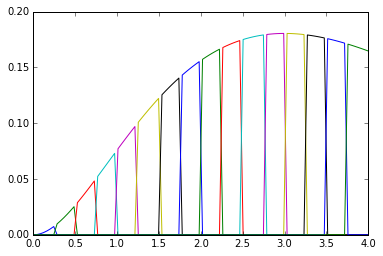

In [131]:
# look at dndz
zmax = 4.0
nBins = 16
cp.plotModelDNDZbins(z0=1.5,zmax=zmax,nBins=nBins)

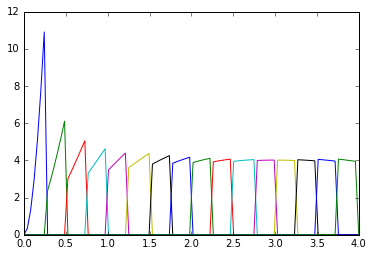

In [132]:
cp.plotModelDNDZbins(z0=1.5,zmax=zmax,nBins=nBins,doNorm=True)

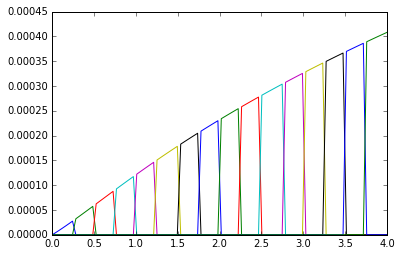

In [133]:
# look at lensing window function, normalized in bins
cp.plotWinKbins(myPk,zmax=zmax,nBins=nBins)

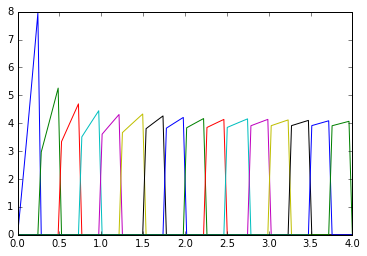

In [134]:
cp.plotWinKbins(myPk,zmax=zmax,nBins=nBins,doNorm=True)

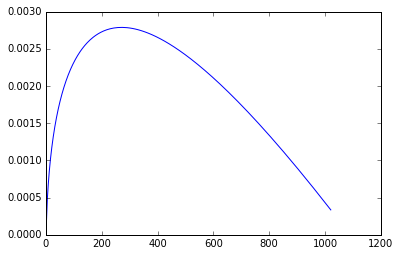

In [135]:
# look at non-normalized version
zs = myPk.zs
winKarray = cp.winKappa(myPk)
plt.plot(zs,winKarray);

(0, 0.0005)

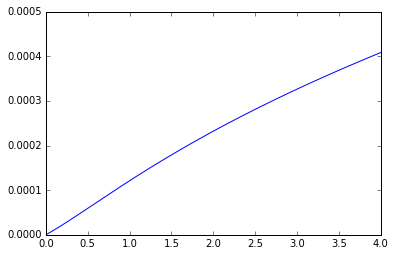

In [136]:
plt.plot(zs,winKarray)
plt.xlim([0,4])
plt.ylim([0,0.0005])

normFac:      0.0185194435554
direct calc:  0.0185185185185
0.333349983997


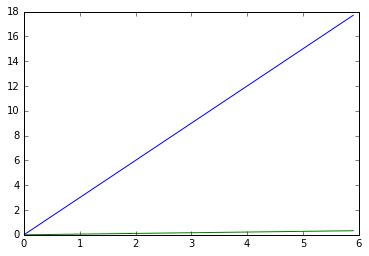

In [145]:
# Check normBin
# use a line through origin; area under it will be of a triangle
myFofZ = lambda z: 3*z
zDomain = np.arange(0,6,1./10)
# get normFac
normFac = cp.normBin(myFofZ,0,6,zDomain,1000)
myResult = myFofZ(zDomain)

# check normFac value
print 'normFac:     ',normFac
print 'direct calc: ',1/(3*6*6*.5) # 1/triangle area
print myFofZ(6)*normFac

plt.plot(zDomain,myResult)
plt.plot(zDomain,myResult*normFac);

binEdges:  [ 0.  1.  2.  3.  4.  5.  6.]
bin edges:  0.0 1.0
normFac: 0.666733273387 

bin edges:  1.0 2.0
normFac: 0.222229622476 

bin edges:  2.0 3.0
normFac: 0.133335997389 

bin edges:  3.0 4.0
normFac: 0.0952394544425 

bin edges:  4.0 5.0
normFac: 0.0740748963062 

bin edges:  5.0 6.0
normFac: 0.06061321672 



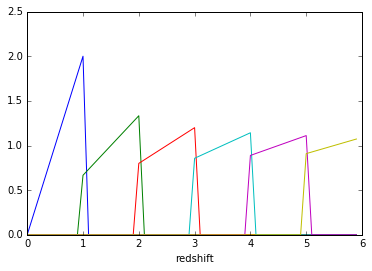

In [147]:
# check using more than 1 bin
reload(cp)
nBins = 6
zmax = 6
normPoints = 1000
verbose = False
binEdges = np.linspace(0,zmax,nBins+1) # +1 for fenceposts 
print 'binEdges: ',binEdges
for binNum in range(nBins):
    print 'bin edges: ',binEdges[binNum],binEdges[binNum+1]
    normFac = cp.normBin(myFofZ,binEdges[binNum],binEdges[binNum+1],zDomain,normPoints, verbose=verbose)
    print 'normFac:',normFac, '\n'
    FRange = myFofZ(zDomain)
    FRange[np.where(zDomain < binEdges[binNum])]   = 0
    FRange[np.where(zDomain > binEdges[binNum+1])] = 0
    plt.plot(zDomain,FRange*normFac)
plt.xlabel('redshift');

In [139]:
# looks like that did it!  Now on to seeing if that fixes things...

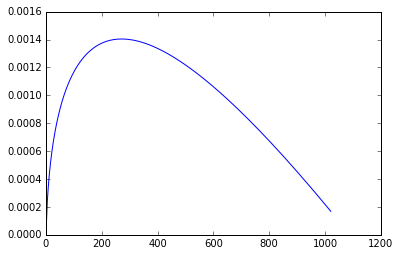

In [140]:
#reload(cp)
binNum = 0 # should do entire range
zs = myPk.zs
normWinK = cp.getNormalizedWinKbin(myPk,binNum,zs)
plt.plot(zs,normWinK);

In [141]:
# normalization does not appear to be working properly for binAs, binBs, in FisherMatrix object.
# set one up for testing:
# with doNorm = False, useWk = True in winGalaxies (need to reload fcl.cp to change)
# trial with myNormPoints = 1000 (in FisherMatrix init)
reload(fcl.cp)
reload(fcl)
zmax = 4
nBins = 4
Fobj = fcl.FisherMatrix(zmax=zmax,nBins=nBins,noAs=True)
print 'binAs: ',Fobj.binAs
print 'binBs: ',Fobj.binBs

creating matter power spectrum object...
zs.size:  998

myZs:  [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
manyZs:  [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
deltaZs:  [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
myF:  [ 0.          0.00138594  0.00518621  0.01091641  0.01815534  0.0265382
  0.0357504   0.04552202  0.05562275  0.0658574 ]
zs in getNormalizedDNDZbin:  [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]

myZs:  [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
manyZs:  [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
deltaZs:  [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
myF:  [  0.00000000e+00   1.08725709e-05   2.24248820e-05   3.44415821e-05
   4.67493264e-05   5.92122967e-05   7.17264908e-05   8.42140278e-05
   9.66178605e-05   1.08897155e-04]
zs in getNormalizedWinKbin:  [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]

myZs:  [ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
manyZs:  [ 1.   1.1  1.2